## Homework Set 4 - Connor Johnson

In [42]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import root
from scipy.misc import derivative
from scipy.signal import argrelextrema
import math
from math import exp
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'png'
from matplotlib import pyplot as plt

from itertools import product

plt.rcParams["font.family"]='Times New Roman'
plt.rcParams["mathtext.fontset"]='stix'
# set fontsize in markdown cells
from IPython.core.display import display, HTML, Math, Latex
display(HTML("<style>.rendered_html { font-size: 16px; }</style>"))

In [43]:
# Phase portrait: streamplot
def PP_2d(x1,x2,y1,y2,f1,f2,ax,nx=100,ny=100,dens=[1,1],lw=1,col='k'):
    ax = ax or plt.gca()
    x = np.linspace(x1,x2,nx)
    y = np.linspace(y1,y2,ny)
    X,Y = np.meshgrid(x,y)
    U = f1(X,Y); V = f2(X,Y)
    ax.streamplot(X,Y,U,V,density=dens,
                 linewidth=lw,color=col,arrowstyle='->')
    return ax

# Phase portrait: nullclines
def PP_nc(x1,x2,y1,y2,f1,f2,ax,nx=100,ny=100,lw=1,c1='m',c2='b'):
    ax = ax or plt.gca()
    x = np.linspace(x1,x2,nx)
    y = np.linspace(y1,y2,ny)
    X,Y = np.meshgrid(x,y)
    U = f1(X,Y); V = f2(X,Y)    
    ax.contour(X,Y,U,[0],colors='m')
    ax.contour(X,Y,V,[0],colors='b')
    return ax   

# Display fixed points
def PP_FPs(FPs,tau,delta,ax, print_stable = False):
    ax = ax or plt.gca()
    for j in np.arange(len(FPs)):
        FP_ = np.array(FPs[j],dtype=float) 
        if tau[j]<0 and delta[j]>0:
            if print_stable:
                print('stable FP: ',FP_)
            ax.plot(FP_[0],FP_[1],'ro',ms=8,mfc='r',mec='r',lw=2)
        else:
            if print_stable:
                print('unstable FP: ',FP_)
            ax.plot(FP_[0],FP_[1],'ro',ms=8,mfc='w',mec='r',lw=2)
    return ax

# Bifurcation diagram: x vs r
def BF_diag(f,x1,x2,r1,r2,nx=80,nr=80,title='',x_lab='$r$'):
    fx = lambda x,r: derivative(f,x,dx=1e-6,args=(r,))
    x=np.linspace(x1,x2,nx)
    r=np.linspace(r1,r2,nr)
    R,X = np.meshgrid(r,x)
    Z = f(X,R)
    Zx= fx(X,R)
    Zu= np.ma.masked_where(Zx<0,Z)
    Zs= np.ma.masked_where(Zx>0,Z)
    fig, ax=plt.subplots()
    ax.contour(R,X,Zs,levels=[0],colors='k',linewidths=3)
    ax.contour(R,X,Zu,levels=[0],colors='k',linewidths=3,linestyles='dashed')
    ax.grid()
    ax.set_xlabel(x_lab)
    ax.set_ylabel('$x^\star$')
    ax.set_title(title,color='b')
    plt.show()   

### Problem 1

#### Part (a)

Solving for the fixed point:<br>
$\dot{x} = 0 \rightarrow y^3-4x=0 \rightarrow x=\frac{y^3}{4}$<br>
$\dot{y} =0 \rightarrow y^3-y-3x=0 \rightarrow y^3-y-\frac{3}{4}x=0 \rightarrow \frac{1}{4}y^3-y=0$ <br>
$y^3-4y=0 \rightarrow y(y^2-4)=0 \rightarrow y(y-2)(y+2)=0 \rightarrow y=0,\pm2$ <br>
$y=0,\pm2 \rightarrow x=0, \pm2$
<br><br>
Fixed points at $(0,0)$, $(2,2)$, $(-2,-2)$.

$A=\begin{bmatrix} \partial_x \dot{x} & \partial_y \dot{x} \\ \partial_x \dot{y} & \partial_y \dot{y} \end{bmatrix}$
$=\begin{bmatrix} -4 & 3y^2 \\ -3 & 3y^2 - 1 \end{bmatrix}$
<br>

Classiifying each fixed point:<br>
$(0,0): A=\begin{bmatrix} -4 & 0 \\ -3 & -1 \end{bmatrix}, det(A)=(-4)(-1) - 0 = 4, tr(A) = -5, \Delta = (tr(A))^2-4det(A) = 9$ <br>
$\>\>\>\>\>\>\>\>\>\>\>\>$ Since $det(A)>0, tr(A)<0,$ and $\Delta>0,$ this fixed point is a stable node.
<br><br>
$(2,2): A=\begin{bmatrix} -4 & 12 \\ -3 & 11 \end{bmatrix}, det(A)=(-4)(11) - (-3)(12) = -8, tr(A) = 7$ <br>
$\>\>\>\>\>\>\>\>\>\>\>\>$ Since $det(A)>0,$ this fixed point is a saddle point.<br>
$\>\>\>\>\>\>\>\>\>\>\>\>$ Finding eigenvectors 
$\lambda_1,\lambda_2=\frac{tr(A)}{2} \pm \sqrt{(\frac{tr(A)}{2})^2 - det(A)}=\frac{7}{2}\pm\sqrt{(\frac{-7}{2})^2 - (-8)}=8,-1$<br>
$\>\>\>\>\>\>\>\>\>\>\>\>$ The eigendirections for the saddle point are $v_1=\begin{bmatrix} 1\\1 \end{bmatrix}$, $v_2=\begin{bmatrix} 4\\1 \end{bmatrix}$
<br><br>
$(-2,-2): A=\begin{bmatrix} -4 & 12 \\ -3 & 11 \end{bmatrix}, det(A)=(-4)(11) - (-3)(12) = -8, tr(A) = 7$ <br>
$\>\>\>\>\>\>\>\>\>\>\>\>$ Since $det(A)>0,$ this fixed point is a saddle point.<br>
$\>\>\>\>\>\>\>\>\>\>\>\>$ Finding eigenvectors 
$\lambda_1,\lambda_2=\frac{tr(A)}{2} \pm \sqrt{(\frac{tr(A)}{2})^2 - det(A)}=\frac{7}{2}\pm\sqrt{(\frac{-7}{2})^2 - (-8)}=8,-1$<br>
$\>\>\>\>\>\>\>\>\>\>\>\>$ The eigendirections for the saddle point are $v_1=\begin{bmatrix} 1\\1 \end{bmatrix}$, $v_2=\begin{bmatrix} 4\\1 \end{bmatrix}$

#### Part (b)

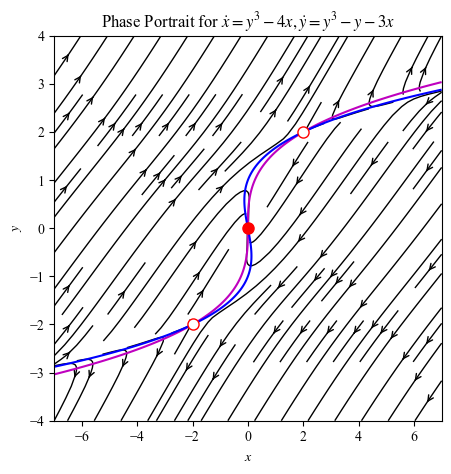

In [56]:
f_x = lambda x,y: y**3 - 4*x
f_y = lambda x,y: y**3 - y - 3*x

_, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_title("Phase Portrait for $\dot{x} = y^3-4x, \dot{y} = y^3-y-3x$")
ax = PP_2d(-7,7,-4,4, f_x, f_y, ax, nx = 6000, ny = 6000)
ax = PP_nc(-7,7,-4,4, f_x, f_y, ax, nx = 2000, ny = 2000)
ax = PP_FPs([(0,0), (2,2), (-2,-2)], [-5,7,7], [4, -8, -8], ax)


The blue nullcine is $0 = y^3-y-3x$; the red nullcline is $0=y^3-4x$.<br>
Above the nullcines, the streamlines shows the systems having both $x$ and $y$ going towards positive infinity; on the contrary, below the nullclines, the streamlines shows the systems having both $x$ and $y$ going towards negative infinity. For the region in the between the nullclines and close to the origin, the streamlines are changing directions to go towards the origin. This make sense since $(0,0)$ is a stable node. For the regions enclosed by the nullclines that are past $|x|>2$, any streamline that originates in the region will go in a direction away from the origin once they reach close enough to either saddle point.

### Problem 2

#### Part (a)

$\frac{d^2u}{d\theta^2} = \frac{d}{d\theta}\frac{du}{d\theta} = \frac{dv}{d\theta}$
<br><br>
2D System: <br>
First dynamic variable: $u = \frac{1}{r}, \frac{du}{d\theta} = u' = v $<br>
Second dynamic variable: $v = \frac{du}{d\theta}, \frac{dv}{d\theta} = v' = \alpha+\epsilon u^2 - u$
<br><br>
Linearized System:
$\dot{X} = AX = \begin{bmatrix} \partial_{u} u' & \partial_{v} u' \\ \partial_{u} v' & \partial_{v} v' \end{bmatrix} \begin{bmatrix} u \\ v \end{bmatrix}$
<br>
$A = \begin{bmatrix} 0 & 1 \\ 2\epsilon u - 1 & 0 \end{bmatrix}$
<br><br>
$\begin{bmatrix} u' \\ v' \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ 2\epsilon u - 1 & 0 \end{bmatrix} \begin{bmatrix} u \\ v \end{bmatrix}$

#### Part (b)

Finding all fixed points:<br>
$u'=0 \rightarrow v=0$<br>
$v'=0 \rightarrow 0=\alpha+\epsilon u^2-u \rightarrow u = \frac{1\pm \sqrt{1-4\epsilon \alpha}}{2\epsilon}$
<br><br>
Fixed points are $(\frac{1+ \sqrt{1-4\epsilon \alpha}}{2\epsilon},0)$ and $(\frac{1- \sqrt{1-4\epsilon \alpha}}{2\epsilon},0)$.


#### Part (c)

Using linearization to catergorize the fixed points:<br>
For both fixed points, $A = \begin{bmatrix} 0 & 1 \\ \pm \sqrt{1-4\epsilon \alpha} & 0 \end{bmatrix}$<br>
$det(A) = \mp \sqrt{1-4\epsilon \alpha}$, $tr(A)=0$
<br><br>
For $(\frac{1+ \sqrt{1-4\epsilon \alpha}}{2\epsilon},0)$, since $det(A)=-\sqrt{1-4\epsilon \alpha}<0$, the fixed point would be a saddle point; for $(\frac{1- \sqrt{1-4\epsilon \alpha}}{2\epsilon},0)$, since $det(A)=\sqrt{1-4\epsilon \alpha}>0$ and $tr(A) = 0$, the fixed point will be a center.

Since a linear center is not by default a nonlinear center. Lets look at the phase portrait for different values of $4\epsilon \alpha$ to see the behavior of the fixed point and to see if it is a center in the nonlinear system.
<br>
For the graphs below, the orange dot is the point $(\frac{1- \sqrt{1-4\epsilon \alpha}}{2\epsilon},0)$ and the blue dot is the point $(\frac{1+ \sqrt{1-4\epsilon \alpha}}{2\epsilon},0)$

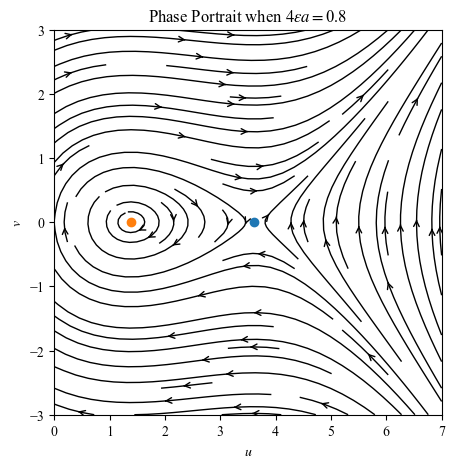

In [45]:
alpha = 1
epsilon = 0.2

f_x = lambda x,y: y
f_y = lambda x,y: alpha + epsilon*x**2 - x

_, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("$u$")
ax.set_ylabel("$v$")
ax.set_title(f"Phase Portrait when $4\epsilon a = ${4*alpha*epsilon}")
ax = PP_2d(0,7,-3,3, f_x, f_y, ax, nx = 5000, ny = 5000)
_ = plt.scatter((1+math.sqrt(1-4*epsilon*alpha))/(2*epsilon),0)
_ = plt.scatter((1-math.sqrt(1-4*epsilon*alpha))/(2*epsilon),0)


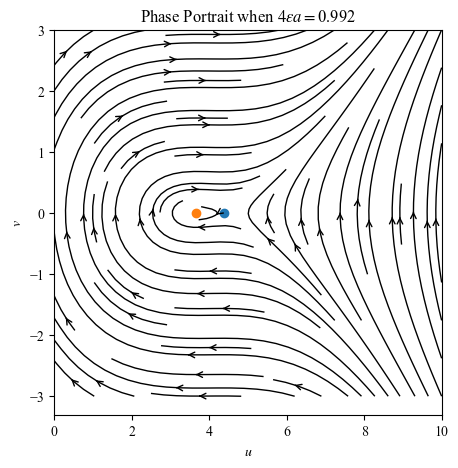

In [46]:
alpha = 2
epsilon = 1.0/(alpha*4) - 0.001

f_x = lambda x,y: y
f_y = lambda x,y: alpha + epsilon*x**2 - x

_, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("$u$")
ax.set_ylabel("$v$")
ax.set_title(f"Phase Portrait when $4\epsilon a = ${4*alpha*epsilon}")
ax = PP_2d(0,10,-3,3, f_x, f_y, ax, nx = 5000, ny = 5000)
_ = plt.scatter((1+math.sqrt(1-4*epsilon*alpha))/(2*epsilon),0)
_ = plt.scatter((1-math.sqrt(1-4*epsilon*alpha))/(2*epsilon),0)

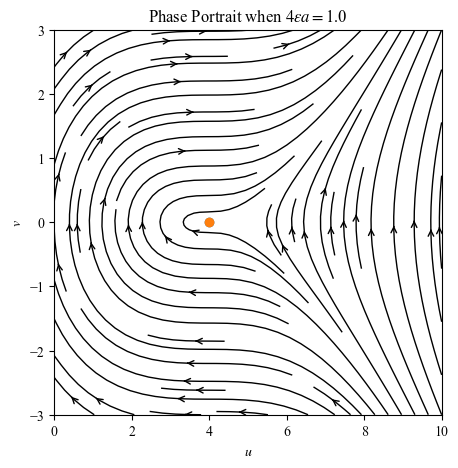

In [47]:
alpha = 2
epsilon = 1.0/(alpha*4)

f_x = lambda x,y: y
f_y = lambda x,y: alpha + epsilon*x**2 - x

_, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("$u$")
ax.set_ylabel("$v$")
ax.set_title(f"Phase Portrait when $4\epsilon a = ${4*alpha*epsilon}")
ax = PP_2d(0,10,-3,3, f_x, f_y, ax, nx = 500, ny = 500)
_ = plt.scatter((1+math.sqrt(1-4*epsilon*alpha))/(2*epsilon),0)
_ = plt.scatter((1-math.sqrt(1-4*epsilon*alpha))/(2*epsilon),0)

Based on the first two graph, when $4\epsilon \alpha$ approaches zeroes, the center and the saddle point will move closer towards eachother. In the third graph, the two fixed points are the same. In the same graph, the streamlines indicate a homoclinic orbit.

From here, it can be inferenced that the system can be treated as a conserved system. In this case $V'(u) = v' = \alpha + \epsilon u^2 - u$. This means that $V(u) = \alpha u - \frac{u^2}{2} + \epsilon \frac{u^3}{3}$. The conserved quantity $E(u,v)$ would be $E(u,v) = \frac{1}{2}v^2 + V(u) = \frac{1}{2}v^2 + \alpha u - \frac{u^2}{2} + \epsilon \frac{u^3}{3}$; $\frac{\partial E(u,v) }{\partial u} = \alpha - u + \epsilon u^2$ and $\frac{\partial E(u,v)}{\partial v} = v$. At the center fixed point, $E(u,v)$ is at a local minimum, meaning that in the nonlinear system, the fixed point remains a center.

#### Part (d)

In the $(u,v)$ phase plane, $u$ is the inverse of distance and $v$ is the rate of change of the inverse of distance. Since trajectories in the plane can be closed, they can correspond to planetary orbits. For trajectories where $u\rightarrow \infty$, these can correspond to orbits where they do not have enough kinetic energy to maintain an orbit and crash towards the planet they are orbiting.

### Problem 3

#### Part (a)

2D System: <br>
First dynamic variable: $x_1 =  x, \dot{x_1} = x_2 $<br>
Second dynamic variable: $x_2 = \dot{x}, \dot{x_2} = -x_1 - \epsilon x_1^3$
<br><br>
Linearized System:
$\dot{X} = AX = \begin{bmatrix} \partial_{x_1} \dot{x_1} & \partial_{x_2} \dot{x_1} \\ \partial_{x_1} \dot{x_2} & \partial_{x_2} \dot{x_2} \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$
<br>
$A = \begin{bmatrix} 0 & 1 \\ -1 - 3\epsilon x_1^2 & 0 \end{bmatrix}$

Finding fixed point: <br>
$\dot{x_1} = 0 \rightarrow x_2=0$<br>
$\dot{x_2} = 0 \rightarrow 0 = -x_1(1+\epsilon x_1^2) \rightarrow x_1=0$<br>
Fixed point at $(0,0)$.
<br>
For the fixed point $(0,0)$, $A = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}$.
<br>
$det(A) = 1$, $tr(A) = 0$.
<br>
Since $det(A)>0$ and $tr(A)=0$, the fixed point is a center.
<br>
Since $\dot{x_1}(x_1, -x_2) = -\dot{x_1}(x_1, x_2)$ and $\dot{x_2}(x_1, -x_2) = \dot{x_2}(x_1, x_2)$, the system is reversible. This means that trajectories that are close to the fixed point are closed trajectories. If $\epsilon>0$, then the only fixed point is the origin, meaning that the origin is a center for the whole system.

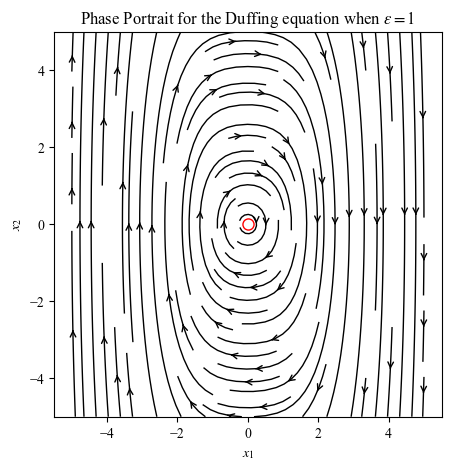

In [48]:
epsilon = 1
f_x = lambda x,y: y
f_y = lambda x,y: -x-epsilon*x**3

_, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_title(f"Phase Portrait for the Duffing equation when $\epsilon=${epsilon}")
ax = PP_2d(-5,5,-5,5, f_x, f_y, ax)

tau = [1]
delta = [0]
ax = PP_FPs([(0,0)], delta=delta, tau=tau, ax=ax)

#### Part (b)

When $\epsilon<0$, the system gains two new fixed points of $(\sqrt{\frac{1}{-\epsilon}},0)$ and $(-\sqrt{\frac{1}{-\epsilon}},0)$.<br>
For both fixed points, $A = \begin{bmatrix} 0 & 1 \\ 2 & 0 \end{bmatrix}$.<br>
$det(A) = -2$, $tr(A) = 0$. Given this, both fixed points are saddle points.

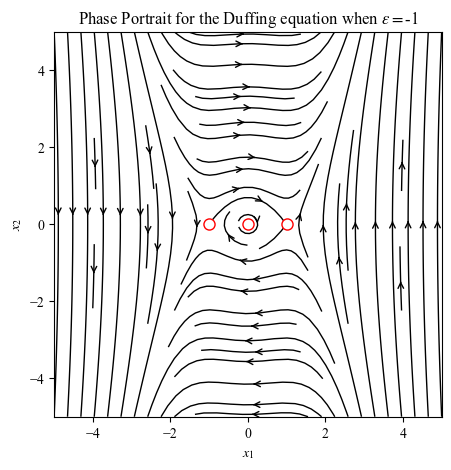

In [49]:
epsilon = -1
f_x = lambda x,y: y
f_y = lambda x,y: -x-epsilon*x**3

_, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_title(f"Phase Portrait for the Duffing equation when $\epsilon=${epsilon}")
ax = PP_2d(-5,5,-5,5, f_x, f_y, ax)

tau = [1, 0, 0]
delta = [0, -2, -2]
ax = PP_FPs([(0,0), (math.sqrt(-1.0/epsilon),0),(-math.sqrt(-1.0/epsilon),0)], delta=delta, tau=tau, ax=ax)

For the fixed point at the origin, since $\dot{x_1}(x_1, -x_2) = -\dot{x_1}(x_1, x_2)$ and $\dot{x_2}(x_1, -x_2) = \dot{x_2}(x_1, x_2)$, the system is reversible. This means that trajectories that are close to the fixed point are closed trajectories. Because of the saddle points, not all trajectories are closed. Based on index theory, a closed curve that does not encompass only the fixed point at the origin (ie. it does not encompass any of the fixed points or encompass at least one of the saddle points) is not a closed trajectory. This means that for trajectories to the left of the left saddle point and to the right of the right saddle point are not closed trajectories. Above and below, if the trajectoreis don't get close enough to the center fixed point, they will go away from it, following the eigendirections of the saddle points.

### Problem 4

#### Part (a)

2D System: <br>
First dynamic variable: $x_1 =  x, \dot{x_1} = x_2 $<br>
Second dynamic variable: $x_2 = \dot{x}, \dot{x_2} = -ax_2(x_1^2+x_2^2-1) - x_1$
<br><br>
Linearized System:
$\dot{X} = AX = \begin{bmatrix} \partial_{x_1} \dot{x_1} & \partial_{x_2} \dot{x_1} \\ \partial_{x_1} \dot{x_2} & \partial_{x_2} \dot{x_2} \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$
<br>
$A = \begin{bmatrix} 0 & 1 \\ -2ax_2x_1-1 & -ax_1^2-3ax_2^2+a \end{bmatrix}$

Fixed point: $(0,0)$

Classifying fixed point:<br>
For $(0,0)$, $A = \begin{bmatrix} 0 & 1 \\ -1 & a \end{bmatrix}$, $det(A)=1>0$, $tr(A)=a>0, \Delta = (tr(A))^2-4det(A) = a^2 - 4$. Given this information, the fixed point is an unstable node when $a>2$, a degenerate source when $a=2$, and an unstable spiral when $a<2$.

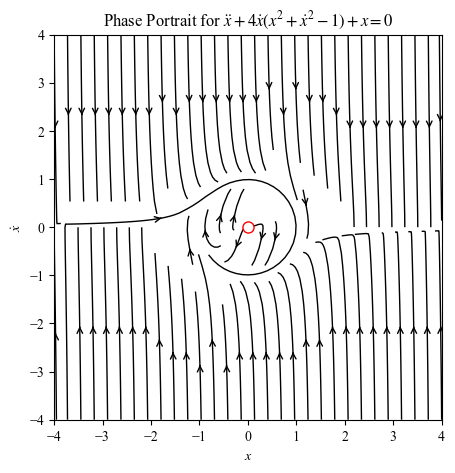

In [50]:
a = 4
f_x = lambda x,y: y
f_y = lambda x,y: -a*y*(x**2+y**2-1)-x

_, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("$x$")
ax.set_ylabel("$\dot{x}$")
ax.set_title("Phase Portrait for $\ddot{x}+$"+f"{a}"+"$\dot{x}(x^2+\dot{x}^2-1)+x=0$")
ax = PP_2d(-4,4,-4,4, f_x, f_y, ax, nx=1000, ny=1000)
#ax = PP_nc(-4,4,-4,4, f_x, f_y, ax, nx=1000, ny=1000)

ax = PP_FPs([(0,0)], [a], [1], ax)

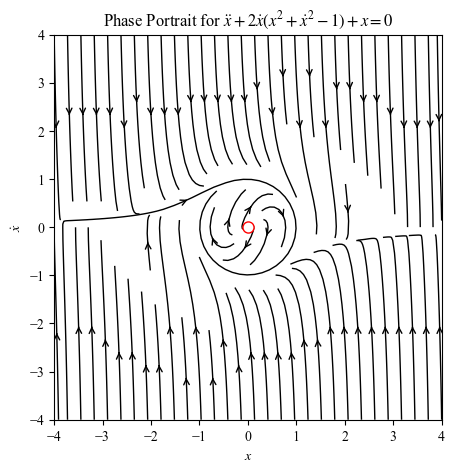

In [51]:
a = 2
f_x = lambda x,y: y
f_y = lambda x,y: -a*y*(x**2+y**2-1)-x

_, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("$x$")
ax.set_ylabel("$\dot{x}$")
ax.set_title("Phase Portrait for $\ddot{x}+$"+f"{a}"+"$\dot{x}(x^2+\dot{x}^2-1)+x=0$")
ax = PP_2d(-4,4,-4,4, f_x, f_y, ax, nx=1000, ny=1000)
#ax = PP_nc(-4,4,-4,4, f_x, f_y, ax, nx=1000, ny=1000)

ax = PP_FPs([(0,0)], [a], [1], ax)

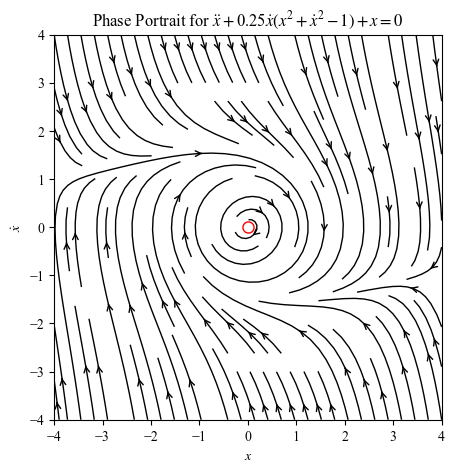

In [52]:
a = 0.25
f_x = lambda x,y: y
f_y = lambda x,y: -a*y*(x**2+y**2-1)-x

_, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("$x$")
ax.set_ylabel("$\dot{x}$")
ax.set_title("Phase Portrait for $\ddot{x}+$"+f"{a}"+"$\dot{x}(x^2+\dot{x}^2-1)+x=0$")
ax = PP_2d(-4,4,-4,4, f_x, f_y, ax, nx=1000, ny=1000)
#ax = PP_nc(-4,4,-4,4, f_x, f_y, ax, nx=1000, ny=1000)

ax = PP_FPs([(0,0)], [a], [1], ax)

#### Part (b)

Shown in the phase portrait below, there is a clear circular limit cycle formed by the streamlines.

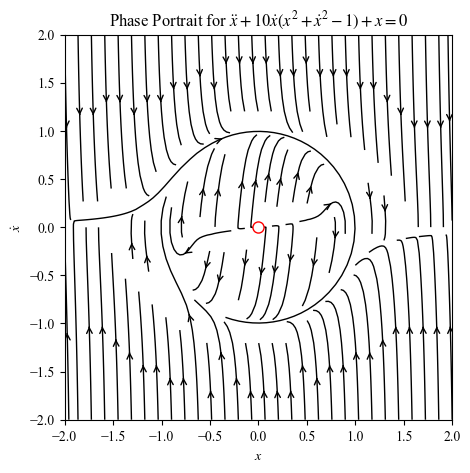

In [53]:
a = 10
f_x = lambda x,y: y
f_y = lambda x,y: -a*y*(x**2+y**2-1)-x

_, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("$x$")
ax.set_ylabel("$\dot{x}$")
ax.set_title("Phase Portrait for $\ddot{x}+$"+f"{a}"+"$\dot{x}(x^2+\dot{x}^2-1)+x=0$")
ax = PP_2d(-2,2,-2,2, f_x, f_y, ax, nx=2000, ny=2000)
#ax = PP_nc(-4,4,-4,4, f_x, f_y, ax, nx=1000, ny=1000)
ax = PP_FPs([(0,0)], [a], [1], ax)

Since for small enough $a$, the system can be thought of as a weakly nonlinear oscillator can the averaged equations can be used:<br>
$h(x_1,x_2) = \dot{x}(x^2+\dot{x}^2-1) \rightarrow h(\theta) = -r(r^2-1)sin\theta$<br>
$r(\theta)=<h(\theta)sin\theta>=\frac{1}{2\pi}\int_0^{2\pi}-r(r^2-1)sin^2\theta d\theta = \frac{-r(r^2-1)}{2\pi}\int_0^{2\pi}\frac{1-cos(2\theta)}{2}d\theta=\frac{-r(r^2-1)}{2}$
<br>
$r\phi'=<h(\theta)cos\theta>=\frac{1}{2\pi}\int_0^{2\pi}-r(r^2-1)sin(\theta)cos(\theta)d\theta = \frac{-r(r^2-1)}{2\pi}\int_0^{2\pi}\frac{sin(2\theta)}{2}d\theta=0$
<br>
$\frac{-r(r^2-1)}{2}=\frac{dr}{dT}\rightarrow 2dT=-r(r^2-1)dr \rightarrow-2T=-ln|r|+\frac{1}{2}ln|r^2-1|+C$<br>
Consider the initial condition $r(T)=b\geq2$,$1=-ln(b)+\frac{1}{2}ln|b^2-1|+C\rightarrow C=1-ln(\frac{b}{\sqrt{b^2-1}})$<br>
When $b\rightarrow \infty$, $C\rightarrow 1$. Therefore, lets take $C=1$.
$e^{-2T}=e^1(\frac{\sqrt{r^2-1}}{r})\rightarrow e^{-2T-1}=\frac{\sqrt{r^2-1}}{r}$<br>
When $T\rightarrow \infty$, the left-hand side of the last equation becomes zero. In order for the right-hand side to be zero, $r=1$. Therefore, after a sufficient amount of time, the amplitude of the oscillation is $1$.

For frequency, since the averaged equations were used, the angular frequency would be $\omega = 1 + O(a^2) \approx 1$. This would mean that the period of oscillation would be $T=\frac{2\pi}{\omega}=2\pi$.

#### Part (c)

Let $r = \sqrt{x_1^2+x_2^2}$, $x_1=rcos(\theta)$, and $x_2=rsin(\theta)$. Then $\dot{r}=\frac{1}{2\sqrt{x_1^2+x_2^2}}(2\dot{x_1}+2\dot{x_2})=-\frac{1}{2}(1-\alpha (r^2-1))$. To use the Pointcare-Bendixson Theorem, a trapping region has to be create. Let this region be a ring, defined by the intersection of two concentric circles where $r_{min}<r<r_{max}$ and the center is at the origin. For $r<r_{min}$, $\dot{r}>0$; for $r>r_{max}$, $\dot{r}<0$. This leads to $r_{min}<\sqrt{\frac{1}{\alpha}+1}$ and $r_{max}>\sqrt{\frac{1}{\alpha}+1}$. Since from part (b), it was determined that for the limit cycle $r=1$, for any value of $\alpha$, the limit cycle will be trapped in the region given sufficient $r_{min}$ and $r_{max}$. This means that the limit cycle is stable in accordance with the Pointcare-Bendixson Theorem.

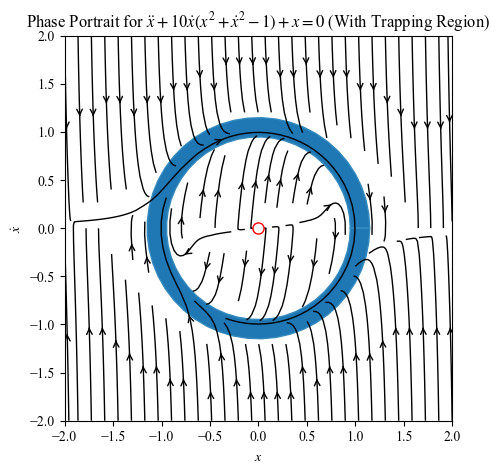

In [54]:
a = 10
f_x = lambda x,y: y
f_y = lambda x,y: -a*y*(x**2+y**2-1)-x

_, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("$x$")
ax.set_ylabel("$\dot{x}$")
ax.set_title("Phase Portrait for $\ddot{x}+$"+f"{a}"+"$\dot{x}(x^2+\dot{x}^2-1)+x=0$ (With Trapping Region)")
ax = PP_2d(-2,2,-2,2, f_x, f_y, ax, nx=2000, ny=2000)
#ax = PP_nc(-4,4,-4,4, f_x, f_y, ax, nx=1000, ny=1000)
ax = PP_FPs([(0,0)], [a], [1], ax)

r = math.sqrt(1+1/a)
n, radii = 50, [r-0.1, r+0.1]
theta = np.linspace(0, 2*np.pi, n, endpoint=True)
xs = np.outer(radii, np.cos(theta))
ys = np.outer(radii, np.sin(theta))

# in order to have a closed area, the circles should be traversed in opposite directions
xs[1,:] = xs[1,::-1]
ys[1,:] = ys[1,::-1]

_ = ax.fill(np.ravel(xs), np.ravel(ys), edgecolor='#348ABD')